In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("file:///Users/achandru/Downloads/players_21.csv")

In [8]:
## LOAD DATASETS
df = pd.read_csv("file:///Users/achandru/Downloads/players_21.csv")  # Update with your file path
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [10]:
## HANDLING MISSING THE DATASETS
df.isnull().sum()  # Check for missing values
df.dropna(subset=['overall'], inplace=True)  # Remove rows with missing ratings

In [12]:
## CHECK UNIQUE VALUES
df['nationality'].nunique()  # Number of unique nationalities
df['club_name'].nunique()  # Number of clubs
df['player_positions'].unique()  # Available positions

array(['RW, ST, CF', 'ST, LW', 'GK', 'ST', 'LW, CAM', 'CAM, CM',
       'ST, LW, RW', 'CB', 'LW', 'RW', 'CF, ST', 'CDM', 'LW, RW',
       'CDM, RB', 'CF, CAM', 'CM', 'LW, ST', 'CDM, CM', 'RM, LM, CAM',
       'RB', 'LB', 'RW, CAM, CM', 'RW, LW', 'ST, CF, LW', 'LM, CF', 'CF',
       'CM, CDM', 'CAM, CF, ST', 'CAM, RM, RW', 'CAM, RM, CF', 'LM, ST',
       'LM', 'CB, CDM', 'CM, CDM, CAM', 'CF, LW, CAM', 'RM, LM, RW',
       'CAM, CM, CF', 'CAM, RW', 'CAM, CF', 'CAM, CM, RM', 'LB, LM',
       'CM, RM, LM', 'LW, CF', 'RW, RM', 'LM, RM, LW', 'CM, LM, LB',
       'LM, LB, CM', 'RB, RM', 'RB, LB', 'LM, RW, LW', 'ST, RW', 'RM, RB',
       'CB, LB', 'CAM, CM, LW', 'RM, CM', 'LM, LW, RM', 'RB, RWB', 'RM',
       'CM, CAM', 'CDM, CB, CM', 'CAM, RM, ST', 'CM, CAM, LM',
       'RW, LW, CAM', 'CM, CAM, CDM', 'CAM, LW, CM', 'LW, CAM, RW',
       'RB, CM', 'RM, CF', 'LM, RM, CF', 'RW, RM, CF', 'ST, RM, CF',
       'LM, LWB', 'LM, RM', 'CAM, RM', 'CDM, CM, RB', 'RM, ST', 'RM, RW',
       'CM, CF, RM', '

In [14]:
## TOP 10 PLAYERS OVER RATING
top_10_players = df[['short_name', 'club_name', 'overall', 'player_positions']]\
                    .sort_values(by='overall', ascending=False).head(10)
print(top_10_players)

           short_name            club_name  overall player_positions
0            L. Messi         FC Barcelona       93       RW, ST, CF
1   Cristiano Ronaldo             Juventus       92           ST, LW
2            J. Oblak      Atlético Madrid       91               GK
3      R. Lewandowski    FC Bayern München       91               ST
4           Neymar Jr  Paris Saint-Germain       91          LW, CAM
5        K. De Bruyne      Manchester City       91          CAM, CM
9             Alisson            Liverpool       90               GK
10            S. Mané            Liverpool       90               LW
11           M. Salah            Liverpool       90               RW
8         V. van Dijk            Liverpool       90               CB


In [16]:
## BEST PLAYER POSITIONS
best_striker = df[df['player_positions'].str.contains('ST', na=False)]\
                .nlargest(1, 'overall')[['short_name', 'overall', 'club_name']]
best_midfielder = df[df['player_positions'].str.contains('CM', na=False)]\
                .nlargest(1, 'overall')[['short_name', 'overall', 'club_name']]
best_defender = df[df['player_positions'].str.contains('CB', na=False)]\
                .nlargest(1, 'overall')[['short_name', 'overall', 'club_name']]
best_goalkeeper = df[df['player_positions'].str.contains('GK', na=False)]\
                .nlargest(1, 'overall')[['short_name', 'overall', 'club_name']]

print("Best Striker:", best_striker)
print("Best Midfielder:", best_midfielder)
print("Best Defender:", best_defender)
print("Best Goalkeeper:", best_goalkeeper)

Best Striker:   short_name  overall     club_name
0   L. Messi       93  FC Barcelona
Best Midfielder:      short_name  overall        club_name
5  K. De Bruyne       91  Manchester City
Best Defender:     short_name  overall  club_name
8  V. van Dijk       90  Liverpool
Best Goalkeeper:   short_name  overall        club_name
2   J. Oblak       91  Atlético Madrid


/var/folders/zs/146_4cyj4pz3ssp1lw6rxm540000gn/T/ipykernel_3665/3080327470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_players['overall'], y=top_10_players['short_name'], palette="viridis")


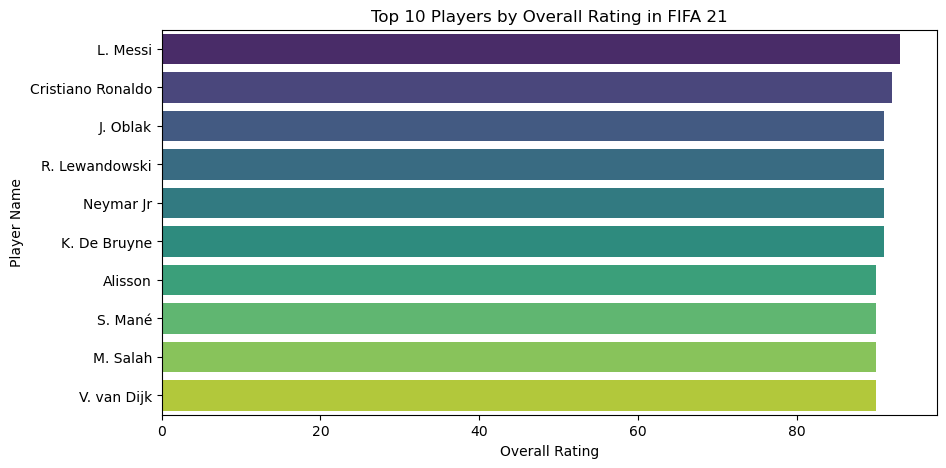

In [18]:
## TOP 10 OVER ALL RATING (BAR CHART)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_players['overall'], y=top_10_players['short_name'], palette="viridis")
plt.xlabel("Overall Rating")
plt.ylabel("Player Name")
plt.title("Top 10 Players by Overall Rating in FIFA 21")
plt.show()

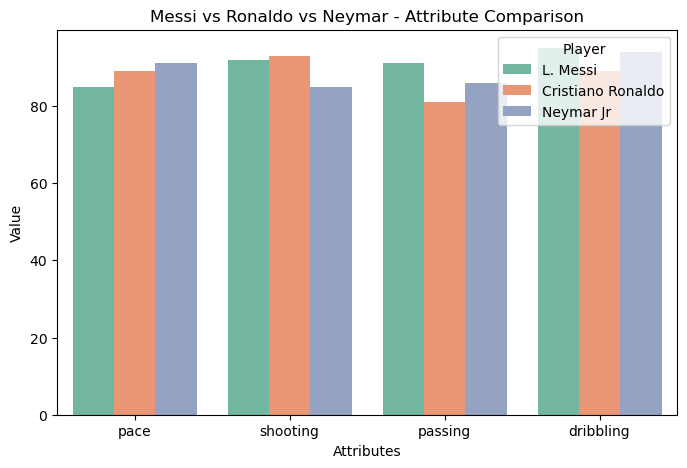

In [20]:
## PLAYER ATTRIBUTES COMPARISON ( MESSI VS RONALDO VS NEYMAR )
players = ['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr']
comparison = df[df['short_name'].isin(players)][['short_name', 'pace', 'shooting', 'passing', 'dribbling']]

# Transform Data for Visualization
comparison_melted = comparison.melt(id_vars=['short_name'], var_name="Attribute", value_name="Value")

plt.figure(figsize=(8, 5))
sns.barplot(x="Attribute", y="Value", hue="short_name", data=comparison_melted, palette="Set2")
plt.xlabel("Attributes")
plt.ylabel("Value")
plt.title("Messi vs Ronaldo vs Neymar - Attribute Comparison")
plt.legend(title="Player")
plt.show()

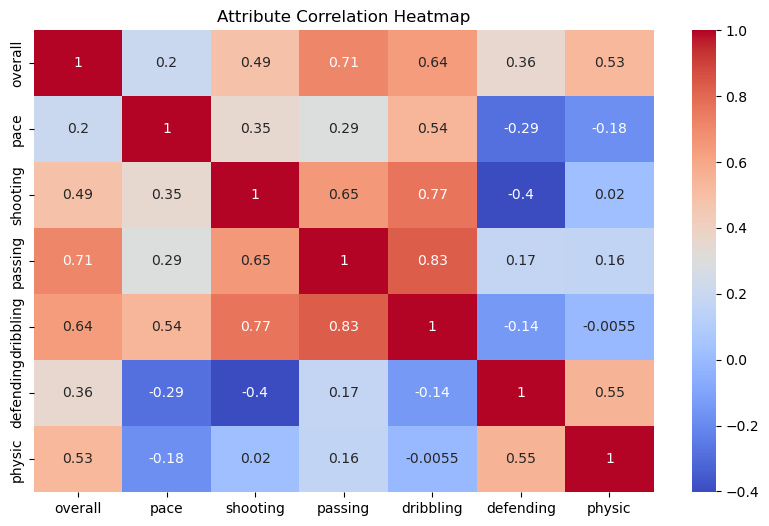

In [22]:
## COLLARATION BETWEEN ATTRIBUTES
plt.figure(figsize=(10, 6))
sns.heatmap(df[['overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].corr(), annot=True, cmap='coolwarm')
plt.title("Attribute Correlation Heatmap")
plt.show()

/var/folders/zs/146_4cyj4pz3ssp1lw6rxm540000gn/T/ipykernel_3665/2117108982.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_nationalities.values, y=top_nationalities.index, palette="muted")


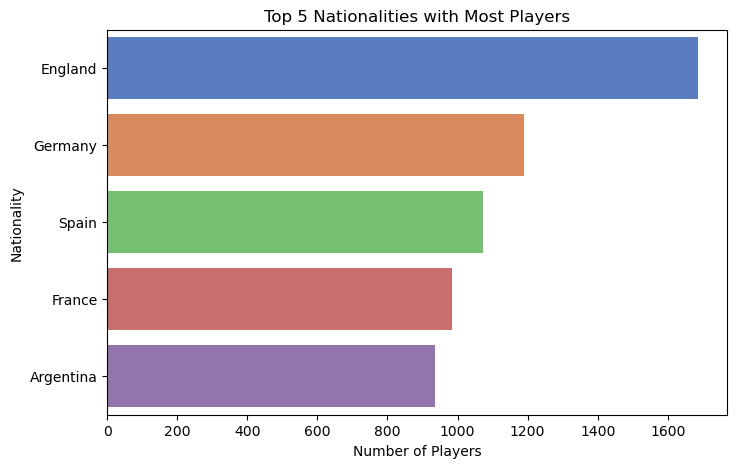

In [24]:
## TOP 5 NATIONALITIES WITH MOST PLAYERS
top_nationalities = df['nationality'].value_counts().head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_nationalities.values, y=top_nationalities.index, palette="muted")
plt.xlabel("Number of Players")
plt.ylabel("Nationality")
plt.title("Top 5 Nationalities with Most Players")
plt.show()